# Syllabus
1. Introduction to project
2. Dataset description
3. Importing necessary Libraries
3. Exploratory Analysis
4. ML models
5. Conclusion

# Introduction to project 
This project is the final assignment from _NLP:Twitter Sentiment Analysis_ course in Coursera (https://www.coursera.org/learn/twitter-sentiment-analysis/home). The project follows the learning techniques from the course. This project is an attempt to gain foundational understanding on Natural Language Processing (NLP). IBM defines Natural language processing (NLP) as the branch of computer science concerned with giving computers the ability to understand text and spoken words in much the same way human beings can. The customer reviews of amazon product _Alexa_ is used as the primary dataset of the project. The source of this dataset is : https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews .  



# Dataset Description
The dataset contains information about the customer reviews of amazon product, Alexa. The dataset has 3150 reviews or observation with 5 attributes. The description of these 5 attributes are: \
_date_ : Date of review \
_variation_: physical apperance of the product bought\
_verified reviews_: the review given by the customer\
_rating_: rating given by the customer for the product, 5 being the highest and 1 being the lowest\
_feedback_: 0 is a negative review and 1 is a positive review 

# Importing the libraries
We will import all the necessary libraries in the very beginning.

In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
!pip install -q wordcloud
from wordcloud import WordCloud
import string 
import nltk
import warnings
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
jtplot.style(theme='monokai' ,context ='notebook', ticks= True, grid=False)


# Exploratory analysis

In [2]:
import pandas as pd
amazon_reviews = pd.read_csv ("amazon_alexa.tsv", sep = '\t')# as the dataset is a .tsv file

Lets see the first few observations

In [3]:
amazon_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
amazon_reviews.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [5]:
# convert float values to strings
amazon_reviews['verified_reviews'] = amazon_reviews['verified_reviews'].astype(str)

In [6]:
amazon_reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


The mean rating is 4.46 which means that the product is popular. We can also visualize this using a countplot.

C:\Users\benja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

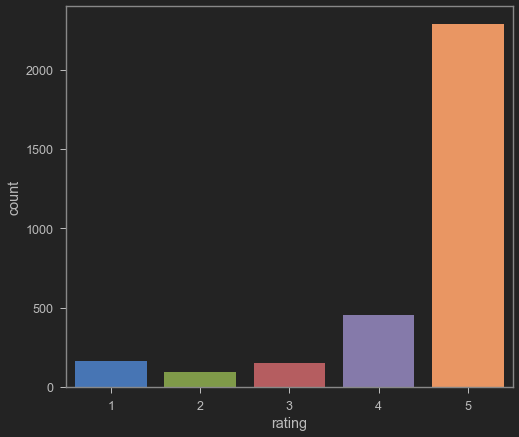

In [7]:
sns.countplot(amazon_reviews['rating'])

The columns are: 

In [8]:
list(amazon_reviews)

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

The descriptions of these columns are already given in the previous section. 
Lets see if the dataset contains any null values.

<AxesSubplot:>

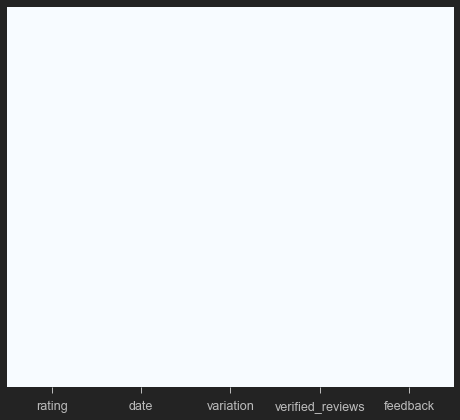

In [9]:
sns.heatmap(amazon_reviews.isnull(),yticklabels = False,cbar= False,cmap ="Blues")

As we cab see from the heatmap, it contains no null values. 
Now we will calculate the characters in each review and input this in a new column named 'length'.

In [10]:
amazon_reviews['length'] = amazon_reviews['verified_reviews'].apply(len)

The updated dataset with 6 columns in total now looks like this:

In [11]:
amazon_reviews.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [12]:
amazon_reviews.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049206
std,1.068506,0.273778,182.100176
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


So, the average length of reviews was 132 characters. Someone left a review with just one character. Let's look at this review. 

In [13]:
amazon_reviews[ amazon_reviews['length'] == 1 ]['verified_reviews']

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

So, there were actually 81 reviews with just one character. And, as we can see that they could be emojis. 

Now, let us investigate the feedback column. 

<AxesSubplot:xlabel='feedback', ylabel='count'>

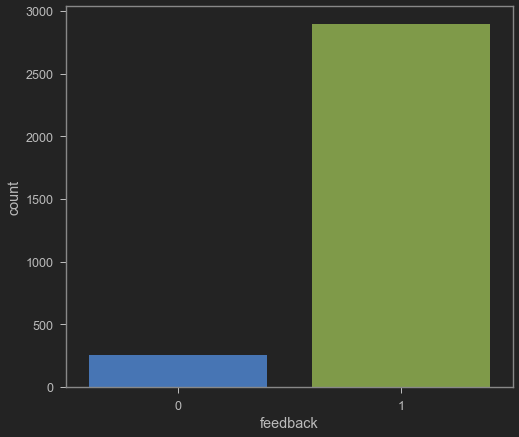

In [14]:
sns.countplot(x = amazon_reviews['feedback'])

Most of the feedback have the value '1' which means that most of the feedback were positive. This supports our observation from analysing the 'rating' column where we saw that the average rating was 4.46.

## Plotting the Wordcloud 

We will plot the wordcloud to see the most frequent words used in the reviews. We can gain a lot of insight about the general public sentiment towards the product from the wordcloud. 

So, we will create a list that contains all of the reviews and join all the reviews to get a single block of text having the content of all the reviews.

In [15]:
sentences = amazon_reviews['verified_reviews'].to_list()
single_block = " ".join(sentences)
single_block # contains all of the reviews in a single block

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

Now, we will plot the wordcloud using this single block of text that contains everything. 

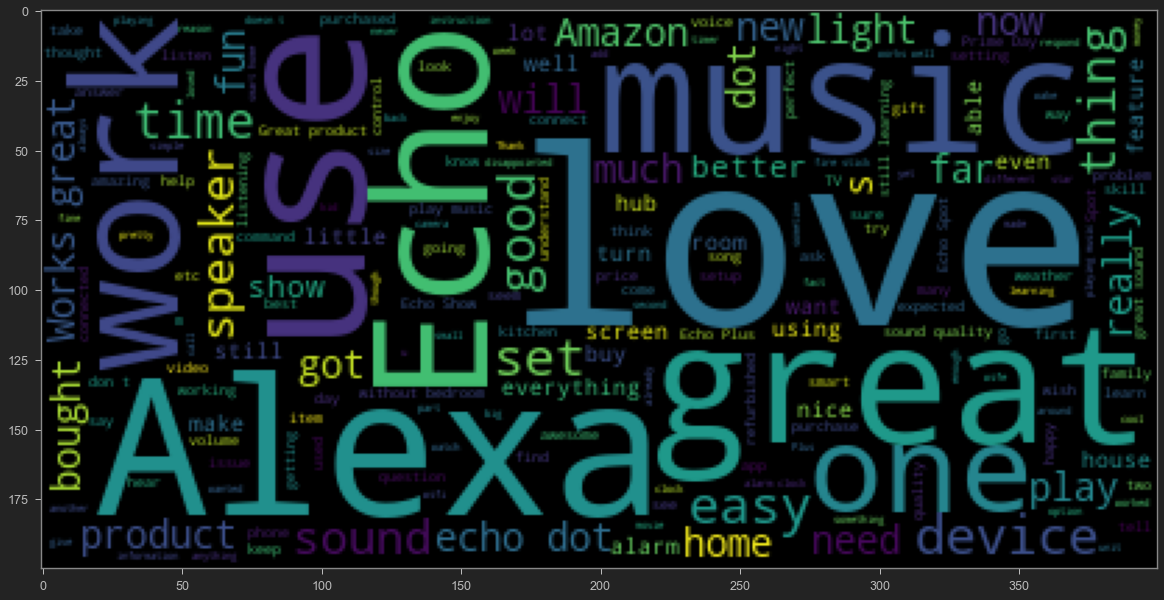

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_block))

As we can see that words like 'love', 'great', 'easy', 'good','light' are the most frequent. This again shows that customers are loving the product. This is great to see as a seller. 
However, there is always room for improvement in any product. So, this wordcloud is not too useful if you are looking for areas of improvement. Something we can do is to look at the wordcloud for negative feedbacks only, so that we can identify areas to imporve. 

Lets create a dataset containing negative reviews only.

In [17]:
negative = amazon_reviews[amazon_reviews['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


Now, we can follow similar steps as before to plot the wordcloud.

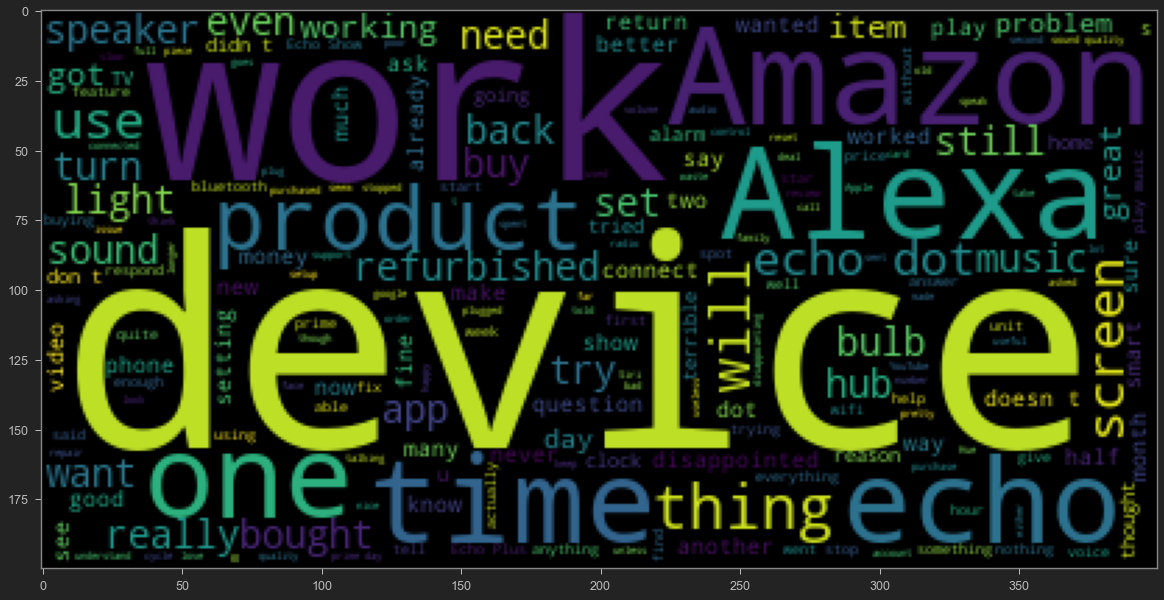

In [18]:
neg_sentences = negative['verified_reviews'].to_list()
neg_block =" ".join(neg_sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(neg_block))

Here, we can see words that show negative sentiments like 'disappointed', 'problem','doesn't'. As a seller, this can provide us hints at what areas the customers are having problems and where we could make improvements. 

The appearance of 'refurbished' could mean that customers are having troubles when they bought refurbished products. The word 'echo' could mean that there is presence of echo, 'work' and 'working' could mean that the product never worked, 'screen' could mean that there are problems with the screen.

## Data Cleaning and Count Vectorizer

In the next steps, we will make the data ready for applying models. We will clean the data by removing punctuation and stopwords. Then, we will perform count vectorization in the data (count vectorization is counting the number of occurences of each words in the whole document). 

In [19]:
def cleaning(text): #this function removes punctuation and stopwords
    removing_punctuation = [char for char in text if char not in string.punctuation]
    joined = ''.join(removing_punctuation)
    clean_data = [word for word in joined.split() if word.lower() not in stopwords.words('english')]
    return clean_data

In [20]:
# we will apply the function to our reviews
clean_reviews = amazon_reviews['verified_reviews'].apply(cleaning)

Lets see how the original reviews compare to the cleaned reviews.


In [21]:
print(amazon_reviews['verified_reviews'][1]) #original first review

Loved it!


In [22]:
print(clean_reviews[1]) #cleaned first review

['Loved']


As we can see that our function was successful in removing the stopword ('it') and the punctuation ('!').

Now we will perform count vectorization.

In [23]:
vectorizer = CountVectorizer(analyzer = cleaning)
reviews_countvectorizer = vectorizer.fit_transform(amazon_reviews['verified_reviews'])

In [24]:
# Let see the unique words in all reviews
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
# the array of our reviews, this will be used as input for our model
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
# let's see the shape of pur array
reviews_countvectorizer.shape

(3150, 5212)

This means that we have 3150 reviews and 5211 unique words.

# ML Models

Now that we have cleaned the reviews and transformed them into array form, we can apply machine learning models to perform classification on the data. Our categorical variable 'feedback' is the outcome variable we are trying to predict based on our predictor variable which is the array from reviews. __Our goal is to create a model that can predict whethere a review is 'positive' or 'negative'.__ 

The predictor variable or the array is 'X' and the outcome variable or the 'feedback' is y.

In [27]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews
y = amazon_reviews['feedback']

As we are performing supervised learning on the reviews, we need to split the data into training and testing data. We will use a 70/30 ratio to split the data.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Naive Bayes 

In [29]:
NB_classifier  =MultinomialNB()
NB_classifier.fit(X_train,y_train)
y_predict = NB_classifier.predict(X_test)


0.9349206349206349
              precision    recall  f1-score   support

           0       0.79      0.35      0.48        55
           1       0.94      0.99      0.97       575

    accuracy                           0.93       630
   macro avg       0.87      0.67      0.72       630
weighted avg       0.93      0.93      0.92       630



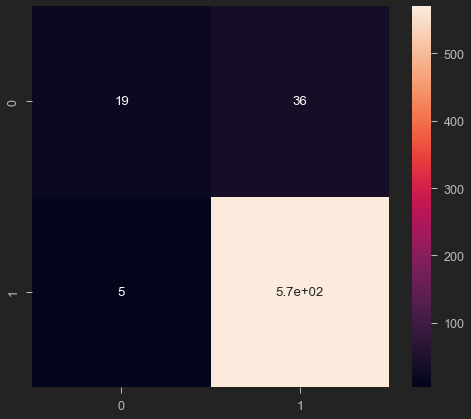

In [30]:
# Lets see the perfomance of our model
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

So, our model performs pretty good with an accuracy of 94%.

### Logistic Regression

In [31]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)

0.9285714285714286
              precision    recall  f1-score   support

           0       0.81      0.24      0.37        55
           1       0.93      0.99      0.96       575

    accuracy                           0.93       630
   macro avg       0.87      0.62      0.66       630
weighted avg       0.92      0.93      0.91       630



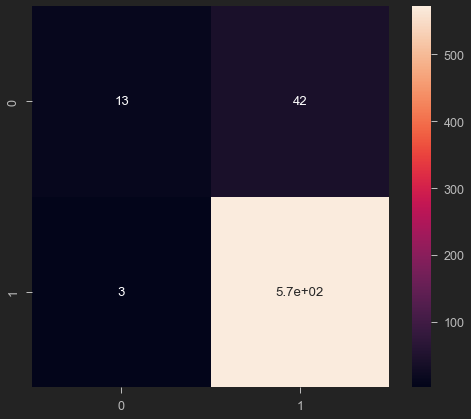

In [32]:
# Lets see the perfomance of our model
cm_logit = confusion_matrix(y_test, y_pred_logit)
sns.heatmap(cm_logit, annot=True)
print(accuracy_score(y_test,y_pred_logit))
print(classification_report(y_test,y_pred_logit))

The accuracy of our model is 93.1 %.

### Gradient Boost

In [33]:
XG = GradientBoostingClassifier()
XG.fit(X_train, y_train)

y_pred_XG = XG.predict(X_test)

0.9079365079365079
              precision    recall  f1-score   support

           0       0.36      0.07      0.12        55
           1       0.92      0.99      0.95       575

    accuracy                           0.91       630
   macro avg       0.64      0.53      0.54       630
weighted avg       0.87      0.91      0.88       630



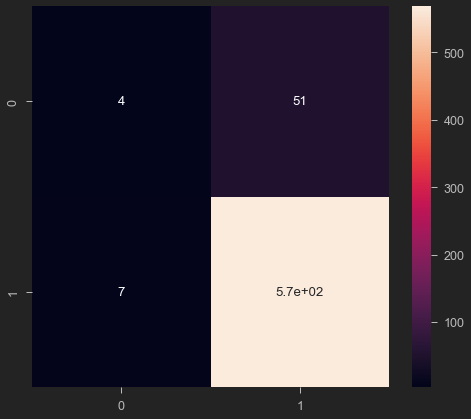

In [34]:
# Lets see the perfomance of our model
cm_XG = confusion_matrix(y_test, y_pred_XG)
sns.heatmap(cm_XG, annot=True)
print(accuracy_score(y_test,y_pred_XG))
print(classification_report(y_test,y_pred_XG))

The accuracy of our model is 92.3 %. 

### Decision Tree 

In [35]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

0.9222222222222223
              precision    recall  f1-score   support

           0       0.56      0.53      0.54        55
           1       0.96      0.96      0.96       575

    accuracy                           0.92       630
   macro avg       0.76      0.74      0.75       630
weighted avg       0.92      0.92      0.92       630



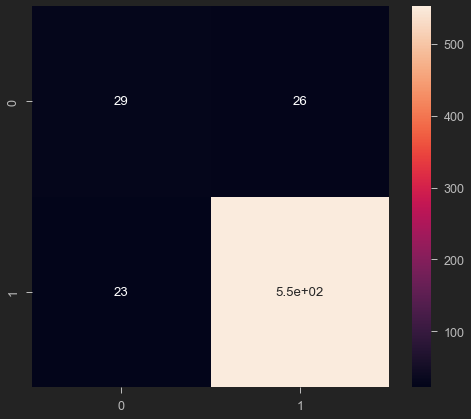

In [36]:
# Lets see the perfomance of our model
cm_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm_DT, annot=True)
print(accuracy_score(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))

The accuracy of our Decision Tree model is 92.8 %. 

### Random Forest

In [37]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

0.9349206349206349
              precision    recall  f1-score   support

           0       0.94      0.27      0.42        55
           1       0.93      1.00      0.97       575

    accuracy                           0.93       630
   macro avg       0.94      0.64      0.69       630
weighted avg       0.94      0.93      0.92       630



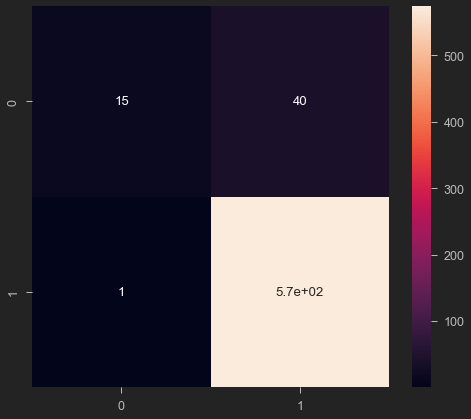

In [38]:
# Lets see the perfomance of our model
cm_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm_RF, annot=True)
print(accuracy_score(y_test,y_pred_RF))
print(classification_report(y_test,y_pred_RF))

The accuracy of our random forest model is 93.5 %.

### Support Vector Machine

In [39]:
SVC = SVC()
SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)

0.919047619047619
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        55
           1       0.92      1.00      0.96       575

    accuracy                           0.92       630
   macro avg       0.96      0.54      0.55       630
weighted avg       0.93      0.92      0.89       630



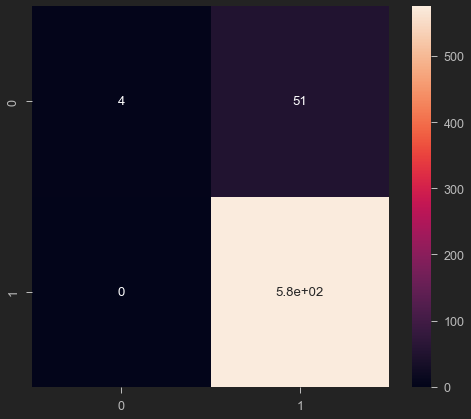

In [40]:
# Lets see the perfomance of our model
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
sns.heatmap(cm_SVC, annot=True)
print(accuracy_score(y_test,y_pred_SVC))
print(classification_report(y_test,y_pred_SVC))

The accuracy of our support vector machine model is 92.06 %.

### K-Nearest Neighbour (KNN)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

In [ ]:
# Lets see the perfomance of our model
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm_KNN, annot=True)
print(accuracy_score(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

The accuracy of our KNN model is 90.6 %. 

So, the best performing machine learning model for our data is __Naive Bayes__ with an accuracy of 94.1 %. 

# Conclusion

Thus, we successfully found a machine learning model capable of predicting whether a review is positive or negative with a high accuracy of 94.1 %. 